In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/8th-century-tamil-inscriptions/Modern characters/7/7.jpeg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/17/char_17.jpg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/19/char_19.jpg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/22/char_22.jpg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/2/2.jpeg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/23/23.jpeg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/10/10.jpeg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/5/5.jpeg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/20/char.jpg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/25/25.jpeg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/8/8.jpeg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/12/12.jpeg
/kaggle/input/8th-century-tamil-inscriptions/Modern characters/0/0.jpeg
/kaggle/input/8th-century-tamil-ins

In [2]:
# Let's explore the directory structure under the provided paths
input_dirs = [
    "/kaggle/input/8th-century-tamil-inscriptions/augmented_images",
    "/kaggle/input/8th-century-tamil-inscriptions/images_categorised"
]

# Collecting directory structure for both provided paths
input_directory_structure = {}
for input_dir in input_dirs:
    input_directory_structure[input_dir] = []
    for dirpath, dirnames, filenames in os.walk(input_dir):
        input_directory_structure[input_dir].append((dirpath, dirnames, filenames))

input_directory_structure


{'/kaggle/input/8th-century-tamil-inscriptions/augmented_images': [('/kaggle/input/8th-century-tamil-inscriptions/augmented_images',
   ['7',
    '17',
    '19',
    '22',
    '23',
    '10',
    '5',
    '20',
    '27',
    '25',
    '8',
    '12',
    '0',
    '18',
    '16',
    '13',
    '26',
    '15',
    '3',
    '1',
    '14',
    '4',
    '9',
    '21',
    '6',
    '11',
    '24'],
   []),
  ('/kaggle/input/8th-century-tamil-inscriptions/augmented_images/7',
   [],
   ['_0_8588.jpg',
    '_0_2289.jpg',
    '_0_2310.jpg',
    '_0_1689.jpg',
    '_0_97.jpg',
    '_0_3582.jpg',
    '_0_5801.jpg',
    '_0_168.jpg',
    '_0_7461.jpg',
    '_0_9292.jpg',
    '_0_7026.jpg',
    '_0_1699.jpg',
    '_0_7152.jpg',
    '_0_6472.jpg',
    '_0_9465.jpg',
    '_0_3351.jpg',
    '_0_6600.jpg',
    '_0_2807.jpg',
    '_0_2319.jpg',
    '_0_2316.jpg',
    '_0_3661.jpg',
    '_0_9561.jpg',
    '_0_947.jpg',
    '_0_5290.jpg',
    '_0_8987.jpg',
    '_0_7601.jpg',
    '_0_4410.jpg',
    '_0_785

# MERGE TO MAKE IN 1 DIR

In [3]:
import os
import shutil

# Directories to merge
augmented_images_dir = '/kaggle/input/8th-century-tamil-inscriptions/augmented_images'
images_categorised_dir = '/kaggle/input/8th-century-tamil-inscriptions/images_categorised'
total_dir = '/kaggle/working/total'

# Create 'total' directory
os.makedirs(total_dir, exist_ok=True)

# List of directories to merge
common_dirs = [
    '7', '17', '19', '22', '23', '10', '5', '20', '27', '25', '8', '12',
    '0', '18', '16', '13', '26', '15', '3', '1', '14', '4', '9', '21', '6', 
    '11', '24'
]

# Merge contents of directories with the same name
for dir_name in common_dirs:
    # Create a corresponding directory in 'total'
    new_dir = os.path.join(total_dir, dir_name)
    os.makedirs(new_dir, exist_ok=True)
    
    # Paths for the directories to merge
    aug_path = os.path.join(augmented_images_dir, dir_name)
    img_cat_path = os.path.join(images_categorised_dir, dir_name)
    
    # Copy files from augmented_images directory
    if os.path.exists(aug_path):
        for file_name in os.listdir(aug_path):
            shutil.copy(os.path.join(aug_path, file_name), new_dir)
    
    # Copy files from images_categorised directory
    if os.path.exists(img_cat_path):
        for file_name in os.listdir(img_cat_path):
            shutil.copy(os.path.join(img_cat_path, file_name), new_dir)


# the dir called final will have the format of train ,val and test 

In [4]:
import os
import shutil
import random

# Define source and target directories
source_dir = '/kaggle/working/total'
final_dir = '/kaggle/working/final'

# Create 'final' directories for train, validation, and test
train_dir = os.path.join(final_dir, 'train')
val_dir = os.path.join(final_dir, 'val')
test_dir = os.path.join(final_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Set the split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Iterate over each directory inside 'total' and split its contents
for folder in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder)
    
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        random.shuffle(files)  # Shuffle the files to randomize
        
        # Calculate split indices
        total_files = len(files)
        train_idx = int(total_files * train_ratio)
        val_idx = train_idx + int(total_files * val_ratio)
        
        # Split files into train, validation, and test
        train_files = files[:train_idx]
        val_files = files[train_idx:val_idx]
        test_files = files[val_idx:]
        
        # Create subfolders for each class in train, val, and test
        os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
        os.makedirs(os.path.join(val_dir, folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, folder), exist_ok=True)
        
        # Copy train files
        for file in train_files:
            shutil.copy(os.path.join(folder_path, file), os.path.join(train_dir, folder))
        
        # Copy val files
        for file in val_files:
            shutil.copy(os.path.join(folder_path, file), os.path.join(val_dir, folder))
        
        # Copy test files
        for file in test_files:
            shutil.copy(os.path.join(folder_path, file), os.path.join(test_dir, folder))


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the train directory path
train_dir = '/kaggle/working/final/train'

# Set up an ImageDataGenerator for loading images from train directory
train_datagen = ImageDataGenerator(rescale=1./255)

# Define train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Print folder names and their corresponding encoded values
print("Class labels and their corresponding encoded values:")
for class_name, encoded_value in train_generator.class_indices.items():
    print(f"Class: '{class_name}' -> Encoded value: {encoded_value}")


Found 1285 images belonging to 27 classes.
Class labels and their corresponding encoded values:
Class: '0' -> Encoded value: 0
Class: '1' -> Encoded value: 1
Class: '10' -> Encoded value: 2
Class: '11' -> Encoded value: 3
Class: '12' -> Encoded value: 4
Class: '13' -> Encoded value: 5
Class: '14' -> Encoded value: 6
Class: '15' -> Encoded value: 7
Class: '16' -> Encoded value: 8
Class: '17' -> Encoded value: 9
Class: '18' -> Encoded value: 10
Class: '19' -> Encoded value: 11
Class: '20' -> Encoded value: 12
Class: '21' -> Encoded value: 13
Class: '22' -> Encoded value: 14
Class: '23' -> Encoded value: 15
Class: '24' -> Encoded value: 16
Class: '25' -> Encoded value: 17
Class: '26' -> Encoded value: 18
Class: '27' -> Encoded value: 19
Class: '3' -> Encoded value: 20
Class: '4' -> Encoded value: 21
Class: '5' -> Encoded value: 22
Class: '6' -> Encoded value: 23
Class: '7' -> Encoded value: 24
Class: '8' -> Encoded value: 25
Class: '9' -> Encoded value: 26


# BASE TRIAL 

Found 1285 images belonging to 27 classes.
Found 265 images belonging to 27 classes.
Found 302 images belonging to 27 classes.
Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733280740.019610     122 service.cc:145] XLA service 0x78d5ec0027b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733280740.019675     122 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1733280767.177383     122 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 6/41 ━━━━━━━━━━━━━━━━━━━━ 1:12 2s/step - accuracy: 0.0402 - loss: 3.3600   

I0000 00:00:1733280778.618013     121 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 484 bytes spill stores, 484 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 492 bytes spill stores, 492 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_12', 420 bytes spill stores, 420 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_11', 432 bytes spill stores, 432 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 52 bytes spill stores, 52 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_10', 420

41/41 ━━━━━━━━━━━━━━━━━━━━ 64s 654ms/step - accuracy: 0.1213 - loss: 3.1252 - val_accuracy: 0.1585 - val_loss: 3.1997
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 355ms/step - accuracy: 0.2107 - loss: 2.7231 - val_accuracy: 0.1585 - val_loss: 3.1138
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 355ms/step - accuracy: 0.2687 - loss: 2.4620 - val_accuracy: 0.1585 - val_loss: 3.0555
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 355ms/step - accuracy: 0.3153 - loss: 2.3461 - val_accuracy: 0.1585 - val_loss: 3.0087
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 350ms/step - accuracy: 0.3298 - loss: 2.2442 - val_accuracy: 0.1585 - val_loss: 3.0130
Epoch 6/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 356ms/step - accuracy: 0.3500 - loss: 2.1552 - val_accuracy: 0.1585 - val_loss: 3.1161
Epoch 7/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 354ms/step - accuracy: 0.3849 - loss: 2.0479 - val_accuracy: 0.1585 - val_loss: 3.5127
Epoch 8/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 356ms/step - accuracy: 0.3824 - loss: 2.0231 - val_accuracy: 0.158

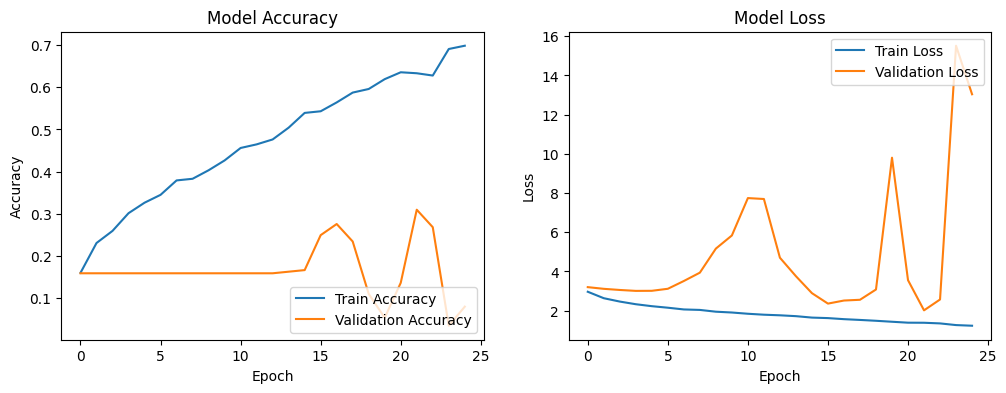

In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, ReLU
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Enable GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Define paths
train_dir = '/kaggle/working/final/train'
val_dir = '/kaggle/working/final/val'
test_dir = '/kaggle/working/final/test'

# Image Data Generators for loading and augmenting the images
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Define custom MobileNet-like model
def create_custom_mobilenet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Depthwise Separable Convolution Block
    def depthwise_separable_conv(x, filters):
        # Depthwise Convolution
        x = DepthwiseConv2D((3, 3), padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        
        # Pointwise Convolution
        x = Conv2D(filters, (1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x

    # Add several depthwise separable convolution blocks
    for filters in [64, 128, 256, 512, 256, 128, 64]:
        x = depthwise_separable_conv(x, filters)

    # Global Average Pooling Layer
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, x)
    return model

# Create and compile the model
input_shape = (224, 224, 3)
num_classes = train_generator.num_classes
model = create_custom_mobilenet(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 25 epochs
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.show()


In [7]:
model.summary()

#It will take a lot of time and resource to train a deep network like this from scratch. 
#It is recommednded to use transfer learning

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 112, 112, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 112, 112, 32)   │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 112, 112, 64)   │           640 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 112, 112, 128)  │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 256)  │        33,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,114,323 (4.25 MB)

 Trainable params: 369,563 (1.41 MB)

 Non-trainable params: 5,632 (22.00 KB)

 Optimizer params: 739,128 (2.82 MB)

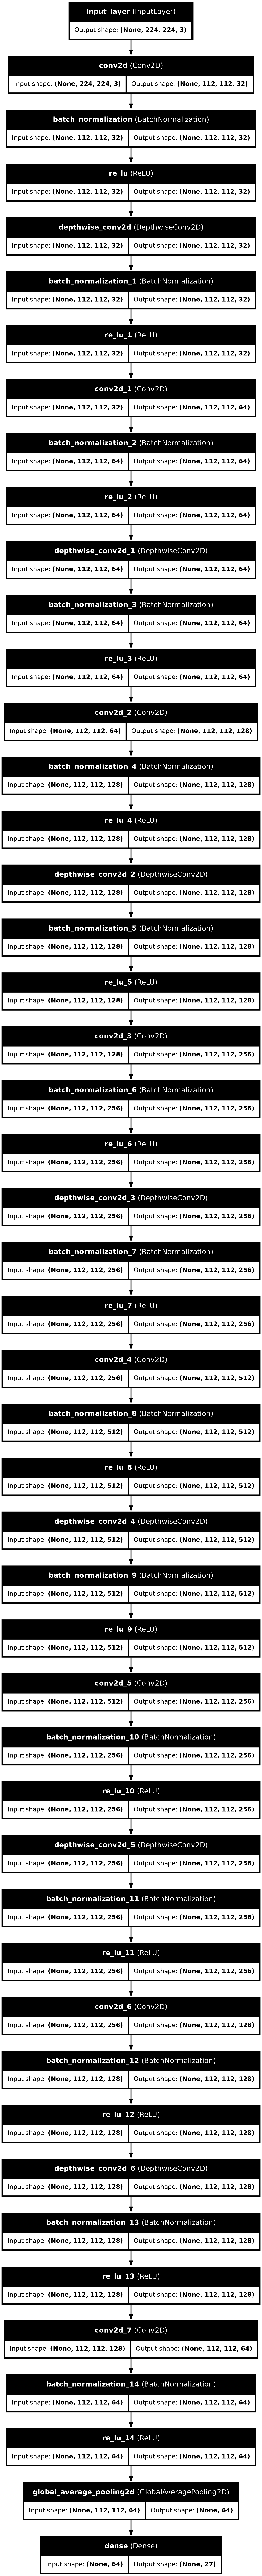

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


# HYPERPARAMETER TESTING AND LR SCHEDULING 

Found 1285 images belonging to 27 classes.
Found 265 images belonging to 27 classes.
Found 302 images belonging to 27 classes.
Training with learning rate: 0.001
Epoch 1/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 58s 599ms/step - accuracy: 0.5349 - loss: 1.7533 - val_accuracy: 0.1585 - val_loss: 11.3859 - learning_rate: 0.0010
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 262ms/step - accuracy: 0.9385 - loss: 0.1839 - val_accuracy: 0.1585 - val_loss: 12.0344 - learning_rate: 0.0010
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.9595 - loss: 0.1310 - val_accuracy: 0.1585 - val_loss: 19.8080 - learning_rate: 0.0010
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 262ms/step - accuracy: 0.9838 - loss: 0.0522 - val_accuracy: 0.1887 - val_loss: 12.1471 - learning_rate: 5.0000e-04
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.9962 - loss: 0.0140 - val_accuracy: 0.2113 - val_loss: 11.1080 - learning_rate: 5.0000e-04
Epoch 6/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - accur

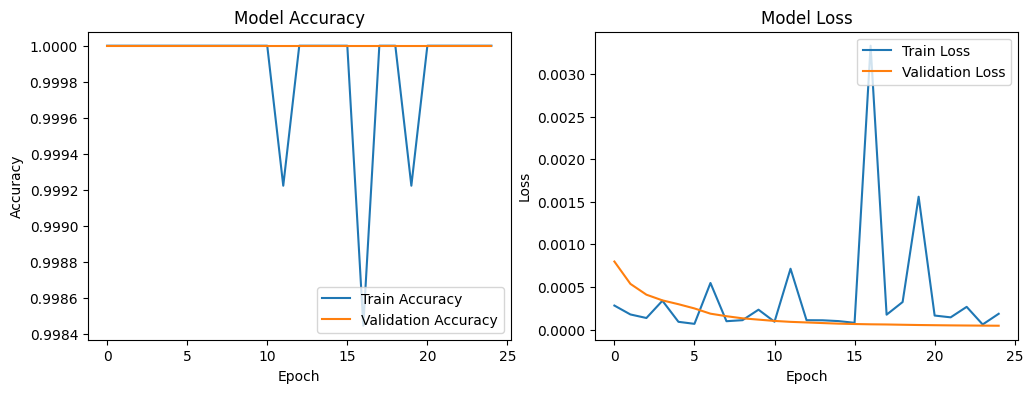

In [11]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, ReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO and WARNING messages

# Enable GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Define paths
train_dir = '/kaggle/working/final/train'
val_dir = '/kaggle/working/final/val'
test_dir = '/kaggle/working/final/test'

# Image Data Generators for loading and augmenting the images
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Define MobileNetV2 model using Sequential
def create_mobilenet(input_shape, num_classes):
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Create the model
input_shape = (224, 224, 3)
num_classes = train_generator.num_classes
model = create_mobilenet(input_shape, num_classes)

# Set up learning rates and callbacks
learning_rates = [0.001, 0.0001, 0.00001]
best_test_accuracy = 0
best_model_path = 'best_model.h5'

# Define a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Loop through each learning rate
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Train the model for 25 epochs
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=25,
        callbacks=[lr_scheduler]  # Using the learning rate scheduler
    )

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test Accuracy for learning rate {lr}: {test_acc * 100:.2f}%")

    # Save the model if it has the best test accuracy
    if test_acc > best_test_accuracy:
        best_test_accuracy = test_acc
        model.save(best_model_path)

# Load the best model for further evaluation or inference if needed
best_model = tf.keras.models.load_model(best_model_path)
print(f"Best Test Accuracy: {best_test_accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.show()


Found 1285 images belonging to 27 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Encoded Value: 1, Corresponding m Value: 1


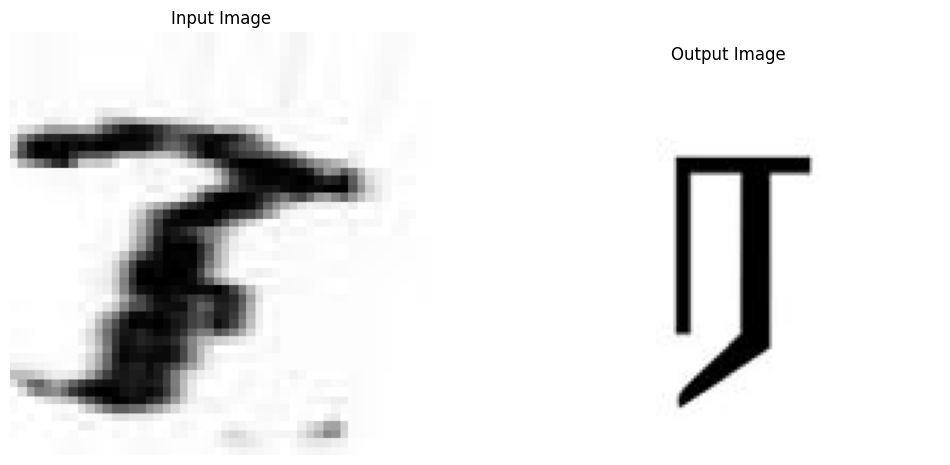

In [15]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define the function to get m value from encoded value
def get_m_value(encoded_value):
    m_values = {
        1: 1,
        2: 10,
        3: 11,
        4: 12,
        5: 13,
        6: 14,
        7: 15,
        8: 16,
        9: 17,
        10: 18,
        11: 19,
        12: 20,
        13: 21,
        14: 22,
        15: 23,
        16: 24,
        17: 25,
        18: 6,
        19: 2,
        20: 3,
        21: 4,
        22: 5,
        23: 26,
        24: 7,
        25: 8,
        26: 9,
    }
    return m_values.get(encoded_value, "Unknown")

# Load the pre-trained model
model_path = '/kaggle/input/best/tensorflow2/default/1/best_model.h5'
model = tf.keras.models.load_model(model_path)

# Define the class labels from the training generator setup
train_dir = '/kaggle/working/final/train'  # Adjust this if needed
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping to get labels

# Prepare a sample input image
input_image_path = '/kaggle/working/final/test/1/_0_1117.jpg'  # Replace with your image path
input_img = load_img(input_image_path, target_size=(224, 224))
input_img_array = img_to_array(input_img) / 255.0
input_img_array = np.expand_dims(input_img_array, axis=0)

# Make prediction
predictions = model.predict(input_img_array)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_encoded_value = predicted_class  # This is the encoded value
predicted_m_value = get_m_value(predicted_encoded_value)  # Now it will work

# Print the predicted values
print(f"Encoded Value: {predicted_encoded_value}, Corresponding m Value: {predicted_m_value}")

# Load the output image from the corresponding m value folder
output_image_folder = f'/kaggle/input/8th-century-tamil-inscriptions/Modern characters/{predicted_m_value}'
output_image_name = os.listdir(output_image_folder)[0]  # Assuming only one image in each folder
output_image_path = os.path.join(output_image_folder, output_image_name)
output_img = load_img(output_image_path)

# Display input and output images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(input_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Output Image')
plt.imshow(output_img)
plt.axis('off')

plt.show()
